# Regression Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Choose one of the following:
# !pip install graphviz
# conda install python-graphviz

In [5]:
from sklearn.tree import export_graphviz
import graphviz

In [6]:
# !pip install pydotplus
import pydotplus
from IPython.display import Image

In [7]:
boston_df = pd.read_csv('Boston.csv')
boston_df[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
boston_df.shape

(506, 14)

In [9]:
y = boston_df.medv
X = boston_df.drop('medv', axis = 1)
X[:3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [10]:
col_names = X.columns.values
col_names

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'], dtype=object)

### Holdout Cross Validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.5,
                                                    test_size = 0.5,
                                                    random_state = 0)

### max_depth = 2

In [12]:
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train);

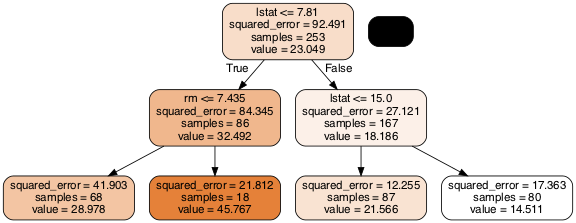

In [13]:
dot_data = export_graphviz(regr_tree_boston,
                                feature_names=col_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"6,6!"')
pydot_graph.write_png('resized_tree.png')
Image(pydot_graph.create_png())

In each node
<ul>
<li> samples = the tree was trained on 253 houses.
<li> value = Average price of the houses in the node-samples
</ul>

To predict the price of a new house follow the tree<br>

In [14]:
newval = boston_df.iloc[:1,:-1]
newval

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [15]:
regr_tree_boston.predict(newval)

array([28.97794118])

Tree predicts house price is 28.977 thousand dollars

In [16]:
pred = regr_tree_boston.predict(X_test)
mspe = mean_squared_error(y_test, pred)
mspe, np.sqrt(mspe)

(28.801544864457945, 5.366707078317014)

In [17]:
# predictions are within $5366 of the home price

In [18]:
# get all mse

In [19]:
regr_tree_boston.tree_.impurity

array([92.49095752, 84.34470119, 41.90318988, 21.81222222, 27.12082828,
       12.25467301, 17.36349844])

In [20]:
# get all node-value 

In [21]:
regr_tree_boston.tree_.value.reshape(7,-1)

array([[23.04901186],
       [32.49186047],
       [28.97794118],
       [45.76666667],
       [18.18622754],
       [21.56551724],
       [14.51125   ]])

### max_depth = 2

In [22]:
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train)
pred = regr_tree_boston.predict(X_test)
mspe = mean_squared_error(y_test, pred)
mspe

28.80154486445794

### max_depth = 4

In [23]:
regr_tree_boston = DecisionTreeRegressor(max_depth = 4)
regr_tree_boston.fit(X_train, y_train)
pred = regr_tree_boston.predict(X_test)
mspe = mean_squared_error(y_test, pred)
mspe

23.81737151382862

In [24]:
# increasing depth reduces test MSE

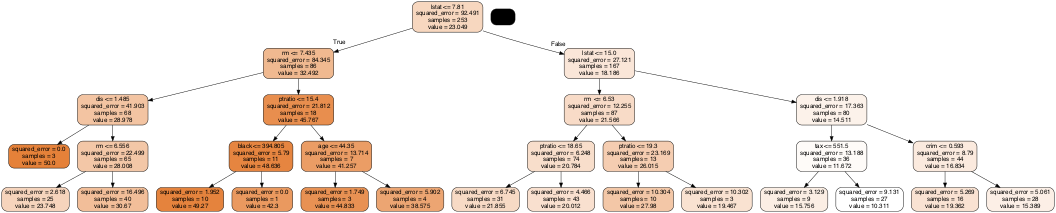

In [25]:
dot_data = export_graphviz(regr_tree_boston,
                                feature_names=col_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"11,11!"')
pydot_graph.write_png('resized_tree.png');
Image(pydot_graph.create_png())

In [26]:
newval

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [27]:
regr_tree_boston.predict(newval)

array([30.67])

This tree predicts house price is 30.67 thousand dollars

### plot (max_depth = 4)

In [28]:
pred = regr_tree_boston.predict(X_test)
pred[:5]

array([23.748     , 20.01162791, 21.85483871, 10.31111111, 20.01162791])

In [29]:
xaxis = np.linspace(0,50,100)

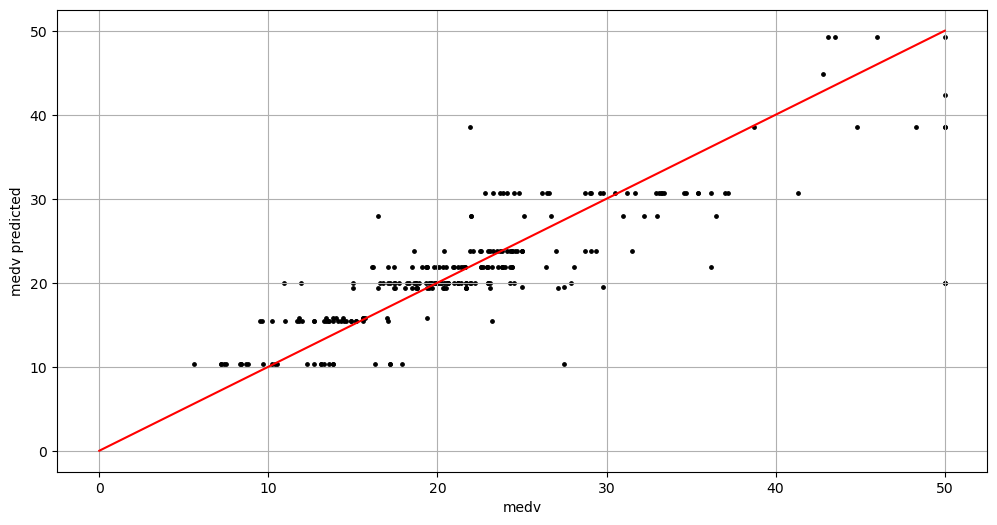

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,pred,s=6,color='k')
plt.plot(xaxis,xaxis,color='r')
plt.xlabel('medv')
plt.ylabel('medv predicted')
plt.grid()

### Holdout Cross validation - tuning max_depth

In [31]:
X_nontest, X_test, y_nontest, y_test = train_test_split(X, y, 
                                                    train_size = 0.60,
                                                    test_size = 0.40,
                                                    random_state = 0)

In [32]:
X_train, X_validation, y_train, y_validation = train_test_split(X_nontest, 
                                                                y_nontest, 
                                                    train_size = 0.5,
                                                    test_size = 0.5,
                                                    random_state = 0)

In [35]:
model = DecisionTreeRegressor(random_state=1)

validation_mspe = []

for i in range(2,22):
    model.set_params(max_depth = i,random_state=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_validation)
    mspe = mean_squared_error(y_validation, pred)
    validation_mspe.append(mspe)

In [36]:
depths = range(2,22)

In [37]:
df = pd.DataFrame(validation_mspe,columns = ['MSPE'])
df.index = depths
df.index.name = 'depth'
df

,MSPE
depth,
2,32.807268
3,27.436607
4,25.529841
5,28.941534
6,31.648445
7,29.914798
8,32.354046
9,28.091195
10,31.524097


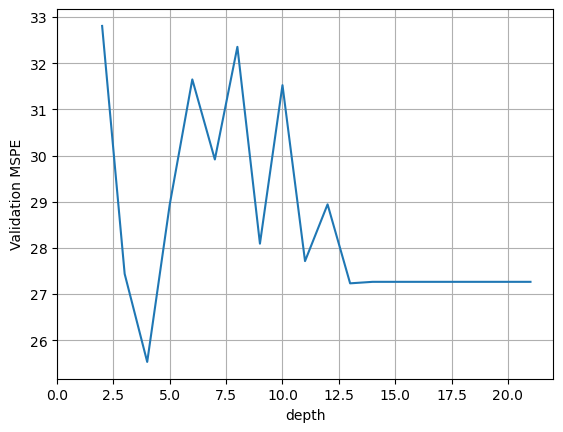

In [38]:
df.plot(grid=True,legend=False,xlim = (0,22))
plt.ylabel('Validation MSPE');

In [39]:
# Test MSE
model6 = DecisionTreeRegressor(max_depth = 4,
                               random_state=1)
model6.fit(X_nontest, y_nontest)
pred = model6.predict(X_test)
mspe = mean_squared_error(y_test, pred)
mspe

15.279743835776737

### Feature Importances for best model

In [40]:
model6.feature_importances_

array([0.03035261, 0.        , 0.        , 0.        , 0.00636331,
       0.27144691, 0.00194428, 0.04951238, 0.        , 0.00494618,
       0.02941881, 0.        , 0.60601552])

In [41]:
df9 = pd.DataFrame(100*model6.feature_importances_,
                   index = X.columns,
                   columns=['importance'])
df9 = df9.sort_values(by = 'importance',axis=0,
                      ascending=False)
df9

,importance
lstat,60.601552
rm,27.144691
dis,4.951238
crim,3.035261
ptratio,2.941881
nox,0.636331
tax,0.494618
age,0.194428
zn,0.000000
indus,0.000000


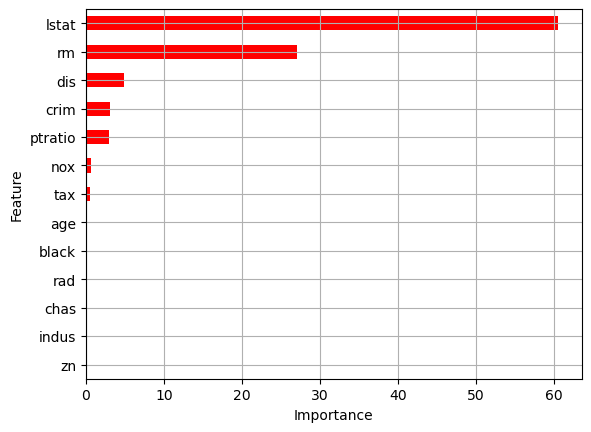

In [42]:
df9 = df9.sort_values(by = 'importance',axis=0,
                      ascending=True)
df9.plot(kind='barh',color='r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

### 5-fold cross validation with max_depth = 6

In [43]:
kfold = KFold(n_splits = 5,random_state=1,shuffle=True)

In [44]:
model = DecisionTreeRegressor(max_depth=6,random_state=1)
mspes = cross_val_score(model,X,y,cv=kfold,
                         scoring = 'neg_mean_squared_error')

In [45]:
mspes

array([-16.04374666, -51.6247105 , -24.23051498, -28.52711802,
       -13.78521779])

In [46]:
# Test MSE

In [47]:
-mspes.mean()

26.84226159037823

### 5-fold cross validation with max_depth tuning

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size = 0.5,
                                                    test_size = 0.5,
                                                    random_state = 0)

In [49]:
model = DecisionTreeRegressor(random_state=1)
parameters = {'max_depth':range(3,20)}

In [50]:
grid = GridSearchCV(model, parameters, cv=5,
                    scoring= 'neg_mean_squared_error')
grid.fit(X_train, y_train);

In [51]:
# display best depth
grid.best_params_

{'max_depth': 7}

In [52]:
# Validation set MSE
-grid.best_score_

23.346767350514753

In [53]:
# Test MSE
-grid.score(X_test,y_test)

24.229018548709014

In [54]:
# Test MSE

In [55]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
ypred = best_model.predict(X_test)
mean_squared_error(y_test, ypred)

24.229018548709014

### Feature Importances for best model

In [56]:
best_model.feature_importances_

array([0.01006972, 0.00067524, 0.00243003, 0.00066191, 0.00097239,
       0.23605734, 0.01446142, 0.08366883, 0.00218774, 0.01565828,
       0.02521014, 0.00762343, 0.60032354])

In [57]:
df9 = pd.DataFrame(100*best_model.feature_importances_,
                   index = X.columns,
                   columns=['importance'])
df9 = df9.sort_values(by = 'importance',axis=0,
                      ascending=False)
df9

,importance
lstat,60.032354
rm,23.605734
dis,8.366883
ptratio,2.521014
tax,1.565828
age,1.446142
crim,1.006972
black,0.762343
indus,0.243003
rad,0.218774


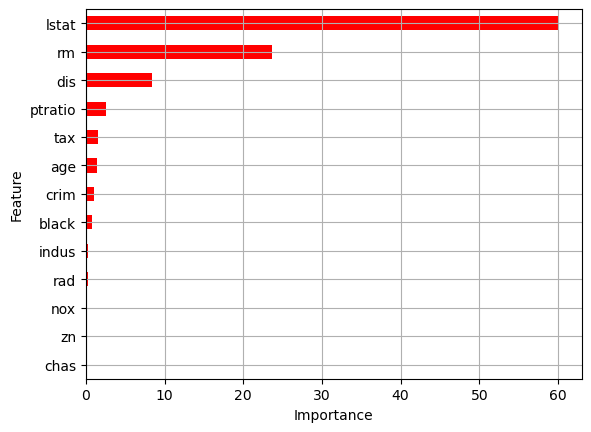

In [58]:
df9 = df9.sort_values(by = 'importance',axis=0,
                      ascending=True)
df9.plot(kind='barh',color='r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()